In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('test.csv')
data = data.dropna()
# To-do list
# Always perform EDA
# If null, incomplete, preprocessing
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [18]:
X = data['x']
Y = data['y']

In [19]:
# Split data into traning and testing 
training_x, testing_x , training_y , testing_y = train_test_split(X,Y, test_size=0.25)

In [20]:
# Y = ax + b 

In [21]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def prediction(self, train_data):
        a = self.parameters['a']
        b = self.parameters['b']
        predictions = np.multiply(a, train_data) + b
        return predictions
    def cost_function(self, predictions, train_output):
        cost = np.mean((predictions - train_output)**2)
        return cost
    def back_propagation(self, train_data, train_ouput, predictions):
        #derivative
        derivatives = {}
        da = 2*np.mean(np.multiply(predictions-train_ouput, train_data))
        db = 2*np.mean(predictions-train_ouput)
        derivatives['da'] = da
        derivatives['db'] = db
        return derivatives
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['a'] = self.parameters['a'] - learning_rate*derivatives['da']
        self.parameters['b'] = self.parameters['b'] - learning_rate*derivatives['db']
        
    def train(self, train_data, train_output, learning_rate, iters):
        # Random starting 
        self.parameters['a'] = np.random.uniform(0,1) * -1
        self.parameters['b'] = np.random.uniform(0,1) * -1
        self.loss = []
        
        def update(iteration):
            predictions = self.prediction(train_data)    
            cost = self.cost_function(predictions, train_output)
            derivatives = self.back_propagation(train_data, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(iteration + 1, cost))

        i = 0
        while i < iters:
            update(i)
            i += 1
        
        return self.parameters, self.loss

In [22]:
linear_regression = LinearRegression()

In [23]:
parameters, loss = linear_regression.train(training_x, training_y, 0.0001, 100)

Iteration = 1, Loss = 5377.866149536589
Iteration = 2, Loss = 583.8176200389987
Iteration = 3, Loss = 70.80675166691708
Iteration = 4, Loss = 15.909482222385478
Iteration = 5, Loss = 10.034923189841571
Iteration = 6, Loss = 9.40628163706233
Iteration = 7, Loss = 9.339005418717282
Iteration = 8, Loss = 9.331800873658178
Iteration = 9, Loss = 9.331024595447962
Iteration = 10, Loss = 9.330936206185987
Iteration = 11, Loss = 9.330921428356465
Iteration = 12, Loss = 9.330914528157
Iteration = 13, Loss = 9.33090847141706
Iteration = 14, Loss = 9.330902505410409
Iteration = 15, Loss = 9.330896549587811
Iteration = 16, Loss = 9.330890595329656
Iteration = 17, Loss = 9.330884641713515
Iteration = 18, Loss = 9.33087868864064
Iteration = 19, Loss = 9.330872736100423
Iteration = 20, Loss = 9.330866784091683
Iteration = 21, Loss = 9.330860832614249
Iteration = 22, Loss = 9.330854881668065
Iteration = 23, Loss = 9.330848931253081
Iteration = 24, Loss = 9.33084298136925
Iteration = 25, Loss = 9.33083

In [24]:
# Evaluation

In [25]:
parameters

{'a': 1.0161635191633784, 'b': -0.5615232612771416}

In [26]:
def linear(x):
    return parameters['a'] * x + parameters['b']

In [27]:
predicted = list(map(linear,training_x))

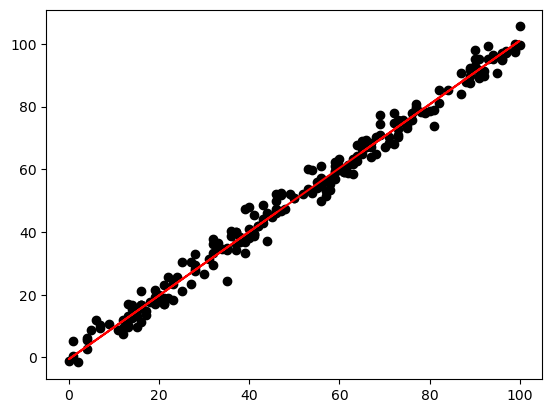

In [28]:
plt.scatter(training_x,training_y, color='black')
plt.plot(training_x, predicted, color='red')

In [29]:
linear(200)

202.67118057139857

In [30]:
# Evalution
# How accurate is the model (y= ax+b) a,b obtained from traninig on data